In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## **Import Dataset**

In [30]:
# import dataset
tr1= r"C:\ProgramData\MySQL\MySQL Server 8.0\Data\gcoffee\transactions_202504.csv"
tr2= r"C:\ProgramData\MySQL\MySQL Server 8.0\Data\gcoffee\transactions_202505.csv"
tr3= r"C:\ProgramData\MySQL\MySQL Server 8.0\Data\gcoffee\transactions_202506.csv"
tr4= r"C:\ProgramData\MySQL\MySQL Server 8.0\Data\gcoffee\transactions_202404.csv"
tr5= r"C:\ProgramData\MySQL\MySQL Server 8.0\Data\gcoffee\transactions_202405.csv"
tr6= r"C:\ProgramData\MySQL\MySQL Server 8.0\Data\gcoffee\transactions_202406.csv"

itemp= r"C:\ProgramData\MySQL\MySQL Server 8.0\Data\gcoffee\items_2504.csv"
itemo= r"C:\ProgramData\MySQL\MySQL Server 8.0\Data\gcoffee\items_2505.csv"
itemi= r"C:\ProgramData\MySQL\MySQL Server 8.0\Data\gcoffee\items_2506.csv"

sto= r"C:\ProgramData\MySQL\MySQL Server 8.0\Data\gcoffee\stores.csv"
men= r"C:\ProgramData\MySQL\MySQL Server 8.0\Data\gcoffee\menu_items.csv"
pay= r"C:\ProgramData\MySQL\MySQL Server 8.0\Data\gcoffee\payment_methods.csv"
vou= r"C:\ProgramData\MySQL\MySQL Server 8.0\Data\gcoffee\vouchers.csv"

trx2504= pd.read_csv(tr1)
trx2505= pd.read_csv(tr2)
trx2506= pd.read_csv(tr3)
trx2404= pd.read_csv(tr4)
trx2405= pd.read_csv(tr5)
trx2406= pd.read_csv(tr6)
items2504= pd.read_csv(itemp)
items2505= pd.read_csv(itemo)
items2506= pd.read_csv(itemi)
store= pd.read_csv(sto)
menu= pd.read_csv(men)
payment= pd.read_csv(pay)
vouchers= pd.read_csv(vou)


trx25= pd.concat([trx2504,trx2505,trx2506], axis=0)
item_25= pd.concat([items2504,items2505,items2506], axis=0)
trx25.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1820194 entries, 0 to 599565
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   transaction_id     object 
 1   store_id           int64  
 2   payment_method_id  int64  
 3   voucher_id         float64
 4   user_id            float64
 5   original_amount    float64
 6   discount_applied   float64
 7   final_amount       float64
 8   created_at         object 
dtypes: float64(5), int64(2), object(2)
memory usage: 138.9+ MB


## **EDA**

Store Exploratory Data Analysis

In [69]:
store

,store_id,store_name,street,postal_code,city,state,latitude,longitude
0,1,G Coffee @ USJ 89q,Jalan Dewan Bahasa 5/9,50998,USJ 89q,Kuala Lumpur,3.117134,101.615027
1,2,G Coffee @ Kondominium Putra,Jln Yew 6X,63826,Kondominium Putra,Selangor Darul Ehsan,2.959571,101.517720
2,3,G Coffee @ USJ 57W,Jalan Bukit Petaling 5/16C,62094,USJ 57W,Putrajaya,2.951038,101.663698
3,4,G Coffee @ Kampung Changkat,Jln 6/6A,62941,Kampung Changkat,Putrajaya,2.914594,101.704486
4,5,G Coffee @ Seksyen 21,Jalan Anson 4k,62595,Seksyen 21,Putrajaya,2.937599,101.698478
5,6,G Coffee @ Alam Tun Hussein Onn,Jln Pasar Besar 63s,63518,Alam Tun Hussein Onn,Selangor Darul Ehsan,3.279175,101.784923
6,7,G Coffee @ Damansara Saujana,Jln 8/74,65438,Damansara Saujana,Selangor Darul Ehsan,3.220810,101.584590
7,8,G Coffee @ Bandar Seri Mulia,Jalan Wisma Putra,58621,Bandar Seri Mulia,Kuala Lumpur,3.140674,101.706562
8,9,G Coffee @ PJS8,Jalan 7/3o,62418,PJS8,Putrajaya,2.952444,101.702623
9,10,G Coffee @ Taman Damansara,Jln 2,67102,Taman Damansara,Selangor Darul Ehsan,3.497178,101.595271


In [26]:
store.iloc[:,[5,4,1]].sort_values('state')

,state,city,store_name
0,Kuala Lumpur,USJ 89q,G Coffee @ USJ 89q
7,Kuala Lumpur,Bandar Seri Mulia,G Coffee @ Bandar Seri Mulia
2,Putrajaya,USJ 57W,G Coffee @ USJ 57W
3,Putrajaya,Kampung Changkat,G Coffee @ Kampung Changkat
4,Putrajaya,Seksyen 21,G Coffee @ Seksyen 21
8,Putrajaya,PJS8,G Coffee @ PJS8
1,Selangor Darul Ehsan,Kondominium Putra,G Coffee @ Kondominium Putra
5,Selangor Darul Ehsan,Alam Tun Hussein Onn,G Coffee @ Alam Tun Hussein Onn
6,Selangor Darul Ehsan,Damansara Saujana,G Coffee @ Damansara Saujana
9,Selangor Darul Ehsan,Taman Damansara,G Coffee @ Taman Damansara


**NOTE**

There are ten stores in three different state. Putrajaya and Selangor Darul Ehsan have more stores than kuala lumpur.

Menu Exploratory Data Analysis

In [27]:
menu

,item_id,item_name,category,price,is_seasonal,available_from,available_to
0,1,Espresso,coffee,6.0,False,NaN,NaN
1,2,Americano,coffee,7.0,False,NaN,NaN
2,3,Latte,coffee,8.0,False,NaN,NaN
3,4,Cappuccino,coffee,8.0,False,NaN,NaN
4,5,Flat White,coffee,9.0,False,NaN,NaN
5,6,Mocha,coffee,9.5,False,NaN,NaN
6,7,Hot Chocolate,non-coffee,9.0,False,NaN,NaN
7,8,Matcha Latte,non-coffee,10.0,False,NaN,NaN


In [43]:
memen= menu['item_id']
le= trx25.merge(item_25[['transaction_id','item_id']], on='transaction_id', how='left')
po=[]
for i in memen:
    if i not in le['item_id'] and po:
        po.append(i)
print(po)

[]


**NOTE**

There are eight choice of drinks that can ordered for eachh store. No menu that only ready or special for one store. The menu have two categories which is coffe and non-coffe.

Voucher Exploratory Data Analysis

In [47]:
vouchers[vouchers['valid_from'].str.contains('2025')]

,voucher_id,voucher_code,discount_type,discount_value,valid_from,valid_to
14,15,SALES66,percentage,6.0,2025-06-06,2025-06-08
15,16,SALES50,percentage,50.0,2025-05-01,2025-05-01


**NOTE**

There are two vouchers that cust could take on may and june.

Transaction Exploratory Data Analysis

In [3]:
trx25.isnull().sum()

transaction_id             0
store_id                   0
payment_method_id          0
voucher_id           1763975
user_id                18349
original_amount            0
discount_applied           0
final_amount               0
created_at                 0
dtype: int64

In [4]:
trx2506.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599566 entries, 0 to 599565
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   transaction_id     599566 non-null  object 
 1   store_id           599566 non-null  int64  
 2   payment_method_id  599566 non-null  int64  
 3   voucher_id         42183 non-null   float64
 4   user_id            593392 non-null  float64
 5   original_amount    599566 non-null  float64
 6   discount_applied   599566 non-null  float64
 7   final_amount       599566 non-null  float64
 8   created_at         599566 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 41.2+ MB


**NOTE**

1. There are no voucher_id used in April transaction. It happened according there are no voucher could be take for transasction in April based on voucher EDA.
2. Number of user_id represented of member of customer. User_id was missing value for non-member customer.

In [5]:
trx2504['created_at']= pd.to_datetime(trx2504['created_at'])
trx2505['created_at']= pd.to_datetime(trx2505['created_at'])
trx2506['created_at']= pd.to_datetime(trx2506['created_at'])
trx2504['hour']= trx2504['created_at'].dt.hour.astype(int)
trx2505['hour']= trx2505['created_at'].dt.hour.astype(int)
trx2506['hour']= trx2506['created_at'].dt.hour.astype(int)
trx2504.head()

,transaction_id,store_id,payment_method_id,voucher_id,user_id,original_amount,discount_applied,final_amount,created_at,hour
0,2b16fe16-b286-4b88-b7fe-7579dd0c8b79,4,5,NaN,939268.0,18.0,0.0,18.0,2025-04-01 15:46:05,15
1,9482feb2-9d77-417a-a5fe-a7ae428fadd3,4,5,NaN,864566.0,58.0,0.0,58.0,2025-04-01 15:46:08,15
2,553cda92-8ab3-4fee-995b-4ad34aecd5dd,2,5,NaN,853878.0,8.0,0.0,8.0,2025-04-01 15:46:10,15
3,5df56dee-cbde-4e2e-ac00-d3b35d04bc3c,6,2,NaN,1415846.0,51.0,0.0,51.0,2025-04-01 15:46:19,15
4,0410efe4-5e84-450d-8d1b-ddd5b23d9a68,3,2,NaN,1438263.0,45.0,0.0,45.0,2025-04-01 07:00:02,7


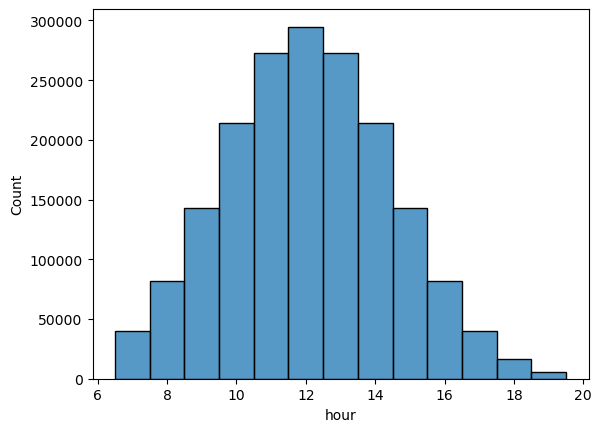

In [6]:
trx25['created_at']= pd.to_datetime(trx25['created_at'])
trx25['hour']= trx25['created_at'].dt.hour.astype(int)

sns.histplot(data=trx25, x='hour', discrete=True)


plt.show()

**NOTE**

Most cust come at lunch time or around 11 am- 1 pm. At the night, there are no significant number of orders.

Product Items Exploratory Data Analysis

In [67]:
# Best Seller Product Based on All Store
trx_items= trx25.merge(item_25[['transaction_id','item_id','quantity','subtotal']], 
                                   on='transaction_id', how='left')
trx_items= trx_items.merge(menu[['item_id','item_name','category']], on='item_id', how='left')
most= trx_items.groupby(['item_id','item_name','category'])[['quantity','subtotal']].sum().reset_index()
most.sort_values('quantity',ascending=False)

,item_id,item_name,category,quantity,subtotal
1,2,Americano,coffee,912144,6385008.0
3,4,Cappuccino,coffee,911300,7290400.0
5,6,Mocha,coffee,911294,8657293.0
2,3,Latte,coffee,911151,7289208.0
0,1,Espresso,coffee,910008,5460048.0
6,7,Hot Chocolate,non-coffee,909055,8181495.0
7,8,Matcha Latte,non-coffee,909007,9090070.0
4,5,Flat White,coffee,908601,8177409.0


In [68]:
# Best Seller Product Based on Store 6(lowest revenue)
trx_store6= trx25[trx25['store_id']==6]
trx_items_store6= trx_store6.merge(item_25[['transaction_id','item_id','quantity','subtotal']], 
                                   on='transaction_id', how='left')
trx_items_store6= trx_items_store6.merge(menu[['item_id','item_name','category']], on='item_id', how='left')
most= trx_items_store6.groupby(['item_id','item_name','category'])[['quantity','subtotal']].sum().reset_index()
most.sort_values('quantity',ascending=False)

,item_id,item_name,category,quantity,subtotal
7,8,Matcha Latte,non-coffee,91009,910090.0
2,3,Latte,coffee,90827,726616.0
6,7,Hot Chocolate,non-coffee,90571,815139.0
3,4,Cappuccino,coffee,90514,724112.0
0,1,Espresso,coffee,90448,542688.0
5,6,Mocha,coffee,90103,855978.5
1,2,Americano,coffee,89873,629111.0
4,5,Flat White,coffee,89381,804429.0


**NOTE**

Matcha latte be the best seller product in Q2 period of 2025 for Store 6 (G Coffee @ Alam Tun Hussein Onn) instead of americano that the best seller product based on all store. Flat White be the worst seller product also both in store 6 or all store overall.